<a href="https://colab.research.google.com/github/uchihadmali/projecto_x/blob/main/Projectox.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

library import

In [29]:
import numpy as np
import matplotlib.pyplot as plt

initialize the time vector

In [2]:
sampling_frequency = 200 #Hz
signal_duration = 2 #seconds
time = np.arange(signal_duration*sampling_frequency) / sampling_frequency+(1/sampling_frequency)

calculate the message signal

In [3]:
message=np.sin(50*np.pi*time)-np.cos(200*np.pi*time)

initialize the quantization vector and sample valve

In [4]:
quant_level=128
max_message_amplitude = max(abs(message))
interval_width=(2*max_message_amplitude)/quant_level
quant_vector = (np.arange(quant_level)*2*max_message_amplitude)/quant_level-max_message_amplitude
sample_valve=quant_vector+(interval_width/2)

Quantization

In [5]:
pcm = np.zeros_like(message,int)

for i, t in enumerate(time):
  comparison= np.zeros_like(sample_valve)+message[i]
  pcm[i] = (int(np.sum(comparison<sample_valve)))


Printing result for the first part

In [6]:
print('{0:07b}'.format(pcm[0]),end="-")
for i in range(8):
   print('{0:07b}'.format(pcm[i+1]),end="-")
print('{0:07b}'.format(pcm[10]),end="")

0001001-1000000-0001001-1100000-0110111-10000000-0110111-1100000-0001001-0001001

initialize time vector for delta modulation

In [13]:
delta_sampling_frequency = 800 #Hz
delta_time = np.arange(signal_duration*delta_sampling_frequency) / delta_sampling_frequency+(1/delta_sampling_frequency)

sampling message signal for delta modulation

In [14]:
message_delta=np.sin(50*np.pi*delta_time)-np.cos(200*np.pi*delta_time)

In [47]:
# define step size
delta_epsilon = 0.75

#initialize the prediction and bits vector
prediction=np.zeros_like(message_delta)
bits=np.zeros_like(message_delta,int)


Modulation

In [48]:
for i, t in enumerate(delta_time):
  if i>0:
    bits[i-1]=int(message_delta[i-1]>prediction[i-1])
    prediction[i]=(2*bits[i-1]-1)*delta_epsilon+prediction[i-1]
print(bits[0:19])

[0 1 1 1 1 0 0 0 1 1 1 0 0 0 0 0 1 1 1]


Plot

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  app.launch_new_instance()


(0.0, 0.1, -2.0, 2.0)

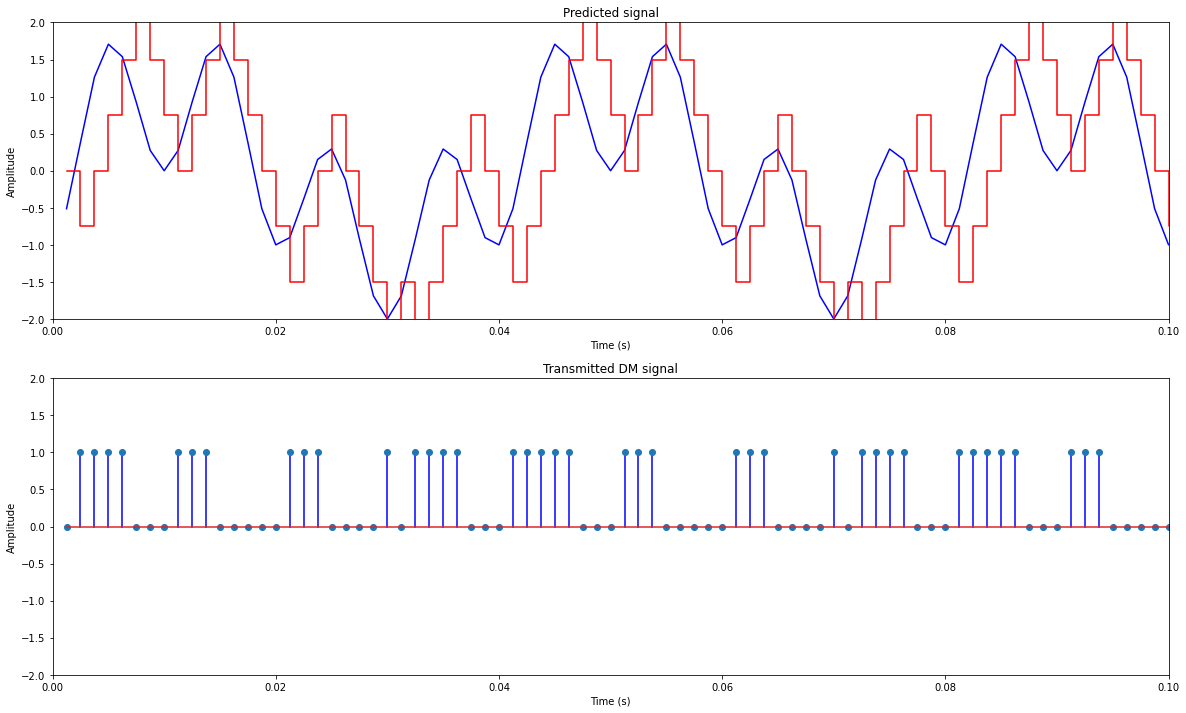

In [49]:
plt.figure(figsize=(20,12))
plt.subplot(2,1,1)
plt.plot(delta_time, message_delta, 'b')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Message signal')
plt.axis([0, 0.1, -2, 2])

plt.step(delta_time, prediction, 'r', where='post')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Predicted signal')
plt.axis([0, 0.1, -2, 2])

plt.subplot(2,1,2)
plt.stem(delta_time, bits, 'b')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Transmitted DM signal')
plt.axis([0, 0.1, -2, 2])